In [2]:
pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -- ------------------------------------- 0.8/11.0 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.0 MB 7.6 MB/s eta 0:00:02
   ----------------- ---------------------- 4.7/11.0 MB 8.6 MB/s eta 0:00:01
   ------------------------- -------------- 7.1/11.0 MB 9.5 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 9.8 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 9.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   - -------------------------------------- 2.1/44.5 MB 11.8 MB/s eta 0:00:04
   --- ------------------------------------ 4.2/44.5 MB 10.5 MB/s eta 0:00:04
   ----- ---------------------------------- 6.3/44.5 MB 10.2 MB/s eta 0:00:04
   ------- -------------------------------- 8.1/44.5 MB 10.1 MB/s eta 0:00:04
   --------- ------------------------------ 10.2/44.5 MB 9.8 MB/s eta 0:00:04
   ---

# Анализ датасета Ирис
Этот ноутбук выполняет несколько этапов анализа данных для набора данных "Ирис". Мы используем `numpy` для загрузки данных.

## Шаг 1: Загрузка и подготовка данных
В этом шаге мы загружаем набор данных Ирис. Мы выделяем признаки и метки в отдельные переменные и проверяем их размеры.

In [11]:
import numpy as np

# Указываем путь к файлу 
file_path = "C:\\Users\\Ангелина\\iris_dataset.csv"

try:
    # Загружаем файл построчно
    with open(file_path, 'r') as f:
        # Читаем строки и пропускаем заголовок
        lines = f.readlines()[1:]
    
    # Разбираем строки в данные и разделяем на признаки и метки
    data = [line.strip().split(',') for line in lines]

    # Преобразуем список в numpy массив
    data = np.array(data)
    
    # Разделяем данные на признаки и метки
    features = data[:, :4].astype(float)  # Признаки (первые 4 столбца)
    labels = data[:, 4]  # Метки (последний столбец)

    # Проверяем размерности и данные
    print(f"Размер матрицы признаков (features): {features.shape}")
    print(f"Размер вектора меток (labels): {labels.shape}")
    print(f"Примеры данных:\n{features[:5]}")
    print(f"Примеры меток:\n{labels[:5]}")

except Exception as e:
    print(f"Ошибка при загрузке или обработке файла: {e}")

Размер матрицы признаков (features): (150, 4)
Размер вектора меток (labels): (150,)
Примеры данных:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
Примеры меток:
['0' '0' '0' '0' '0']


## Шаг 2: Оценка занимаемого объема памяти
Теперь мы вычисляем объем памяти, занимаемый матрицей признаков и вектором меток, используя атрибут `nbytes`.

In [12]:
# Оценка занимаемого объема памяти в байтах
features_size = features.nbytes  # размер матрицы признаков
labels_size = labels.nbytes  # размер вектора меток

print(f'Размер матрицы признаков: {features_size} байт')
print(f'Размер вектора меток: {labels_size} байт')

Размер матрицы признаков: 4800 байт
Размер вектора меток: 1800 байт


## Шаг 3: Нормализация данных
На этом шаге мы нормализуем признаки (каждый столбец) в диапазон от 0 до 1. Это улучшает качество модели и помогает избежать проблем с масштабированием.

In [13]:
# Нормализация данных (0-1) для каждого столбца отдельно
features_min = features.min(axis=0)
features_max = features.max(axis=0)
features_normalized = (features - features_min) / (features_max - features_min)

print("Нормализованные данные (первые 5 строк):\n", features_normalized[:5])

Нормализованные данные (первые 5 строк):
 [[0.22222222 0.625      0.06779661 0.04166667]
 [0.16666667 0.41666667 0.06779661 0.04166667]
 [0.11111111 0.5        0.05084746 0.04166667]
 [0.08333333 0.45833333 0.08474576 0.04166667]
 [0.19444444 0.66666667 0.06779661 0.04166667]]


## Шаг 4: Преобразование признака в категориальную переменную
Теперь представим один из признаков (например, первый) как категориальную переменную, используя квантили. Мы делим значения на три категории: `small`, `medium` и `big`.

In [14]:
# Берем первый признак
feature = features_normalized[:, 0]

# Определяем границы квантилей
q25, q75 = np.percentile(feature, [25, 75])

# Создаем категориальную переменную
categories = np.where(feature < q25, 'small',
                      np.where(feature > q75, 'big', 'medium'))

# Выводим первые 10 категориальных данных для первого признака
print("Категориальные данные для первого признака:\n", categories[:10])

Категориальные данные для первого признака:
 ['medium' 'small' 'small' 'small' 'small' 'medium' 'small' 'small' 'small'
 'small']


## Шаг 5: Разделение на тренировочную и тестовую выборки
Мы делим данные на обучающую и тестовую выборки, используя пропорцию 80% на 20%, для обучения и оценки модели.

In [15]:
# Сначала создадим случайные индексы для разделения данных
np.random.seed(42)  # Для воспроизводимости
indices = np.random.permutation(len(features_normalized))  # Перемешиваем индексы

# Разделяем данные (80% для обучения, 20% для тестирования)
train_size = int(0.8 * len(features_normalized))  # Размер обучающей выборки
train_indices = indices[:train_size]  # Индексы для обучающей выборки
test_indices = indices[train_size:]  # Индексы для тестовой выборки

# Создаем обучающую и тестовую выборки
X_train = features_normalized[train_indices]  # Признаки для обучения
X_test = features_normalized[test_indices]  # Признаки для тестирования
y_train = labels[train_indices]  # Метки для обучения
y_test = labels[test_indices]  # Метки для тестирования

# Выводим размеры выборок
print(f'Размер обучающей выборки: {X_train.shape[0]}')
print(f'Размер тестовой выборки: {X_test.shape[0]}')

Размер обучающей выборки: 120
Размер тестовой выборки: 30


## Шаг 6: Обучение модели классификации и оценка точности
В этом шаге мы обучаем классификатор `SVC` (Support Vector Classifier) на тренировочной выборке и оцениваем точность на тестовой выборке.

In [16]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Создаем и обучаем классификатор
model = SVC()
model.fit(X_train, y_train)

# Предсказываем и оцениваем точность
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Точность классификации: {accuracy:.2f}')

Точность классификации: 0.97


## Шаг 7: Эксперименты с гиперпараметрами
Мы проведем три эксперимента с изменением гиперпараметров модели `SVC`, чтобы увидеть, как это влияет на точность. 

In [17]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 1. Изменение гиперпараметра C
model_1 = SVC(C=0.1)
model_1.fit(X_train, y_train)
y_pred_1 = model_1.predict(X_test)
accuracy_1 = accuracy_score(y_test, y_pred_1)

# 2. Изменение ядра на линейное
model_2 = SVC(kernel='linear')
model_2.fit(X_train, y_train)
y_pred_2 = model_2.predict(X_test)
accuracy_2 = accuracy_score(y_test, y_pred_2)

# 3. Использование данных без нормализации
# Для восстановления данных в исходном масштабе необходимо использовать min и max
features_min = features.min(axis=0)
features_max = features.max(axis=0)

# Восстановление ненормализованных данных
X_train_original = X_train * (features_max - features_min) + features_min
X_test_original = X_test * (features_max - features_min) + features_min

model_3 = SVC()
model_3.fit(X_train_original, y_train)
y_pred_3 = model_3.predict(X_test_original)
accuracy_3 = accuracy_score(y_test, y_pred_3)

# Выводим точности
print(f'Точность модели с C=0.1: {accuracy_1:.2f}')
print(f'Точность модели с линейным ядром: {accuracy_2:.2f}')
print(f'Точность модели с ненормализованными данными: {accuracy_3:.2f}')


Точность модели с C=0.1: 0.97
Точность модели с линейным ядром: 0.97
Точность модели с ненормализованными данными: 0.97


## Шаг 8: Визуализация данных с использованием PCA и t-SNE
Мы уменьшим размерность данных до 2D, используя методы PCA и t-SNE, чтобы построить графики распределения данных с исходными и предсказанными метками.

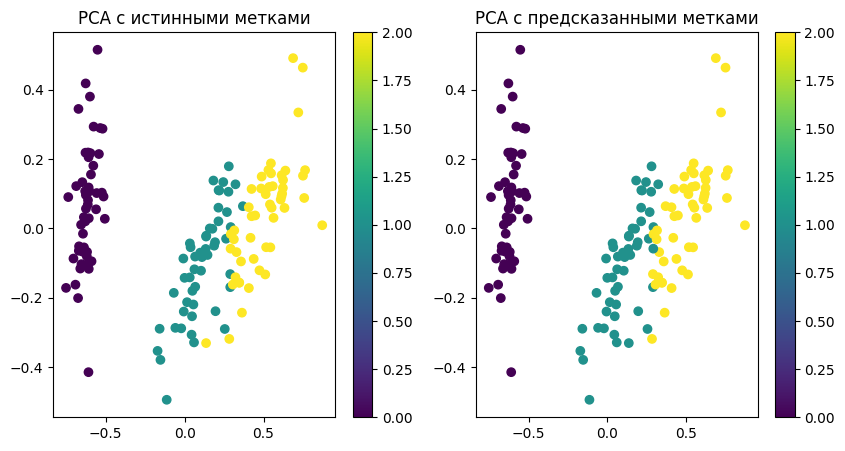

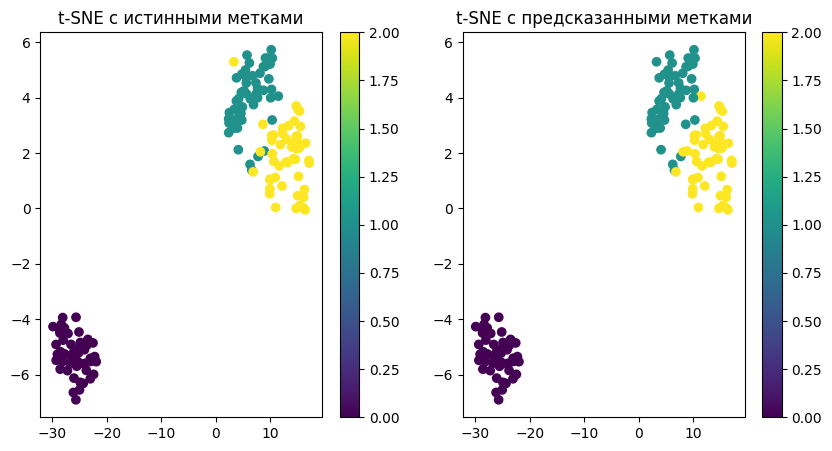

In [18]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Преобразуем данные в 2D с помощью PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(features_normalized)

# Преобразуем данные в 2D с помощью t-SNE
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(features_normalized)

# Преобразуем метки в числовые значения, если они строковые
labels_numeric = np.array([float(label) for label in labels])

# Визуализация PCA с истинными метками
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_numeric, cmap='viridis')
plt.title('PCA с истинными метками')
plt.colorbar()

# Визуализация PCA с предсказанными метками
y_pred_all = model.predict(features_normalized)  # предсказание на всех данных
y_pred_all_numeric = np.array([float(pred) for pred in y_pred_all])
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=y_pred_all_numeric, cmap='viridis')
plt.title('PCA с предсказанными метками')
plt.colorbar()
plt.show()

# Теперь визуализация t-SNE с истинными метками
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=labels_numeric, cmap='viridis')
plt.title('t-SNE с истинными метками')
plt.colorbar()

# Визуализация t-SNE с предсказанными метками
plt.subplot(1, 2, 2)
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], c=y_pred_all_numeric, cmap='viridis')
plt.title('t-SNE с предсказанными метками')
plt.colorbar()
plt.show()